In [15]:
import heapq as hq
import numpy as np
import graphviz as gv
import math

def drawG_al(G, directed=False, Peso=False, Camino=[], layout="sfdp"):
  Grafo = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  n = len(G)
  Anadir = set()
  for v, u in enumerate(Camino):
    if u != -1:
      if Peso:
        for vi, w in G[u]:
          if vi == v:
            break
        Grafo.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        Grafo.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      Anadir.add(f"{u},{v}")
      Anadir.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      Dbujar = False
      if not directed and not f"{u},{v}" in Anadir:  
        Anadir.add(f"{u},{v}")
        Anadir.add(f"{v},{u}")
        Dbujar = True
      elif directed:
        Dbujar = True
      if Dbujar:
        if Peso:
          Grafo.edge(str(u), str(v), str(w))
        else:
          Grafo.edge(str(u), str(v))
  return Grafo
def dijkstra(G, s):
  n = len(G)
  Visitado = [False]*n
  Camino = [-1]*n
  Costo = [math.inf]*n

  Costo[s] = 0
  Cola = [(0, s)]
  while Cola:
    g, u = hq.heappop(Cola)
    if not Visitado[u]:
      Visitado[u] = True
      for v, w in G[u]:
        if not Visitado[v]:
          f = g + w
          if f < Costo[v]:
            Costo[v] = f
            Camino[v] = u
            hq.heappush(Cola, (f, v))

  return Camino, Costo

In [2]:
%%file Prueba.al
1 84 4 23
3 62 2 34 6 85
1 54 5 90
2 50
6 89
1 14 3 91
5 4 7 53
6 32

Writing Prueba.al


In [3]:
with open("Prueba.al") as f:
  G = []
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append((nums[i], nums[i+1]))

for x in G:
  print(x)

[(1, 84), (4, 23)]
[(3, 62), (2, 34), (6, 85)]
[(1, 54), (5, 90)]
[(2, 50)]
[(6, 89)]
[(1, 14), (3, 91)]
[(5, 4), (7, 53)]
[(6, 32)]


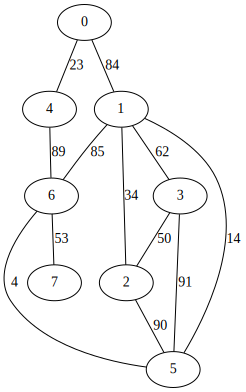

In [13]:
drawG_al(G, Peso=True)


[-1, 0, 1, 1, 0, 6, 4, 6]
[0, 84, 118, 146, 23, 116, 112, 165]


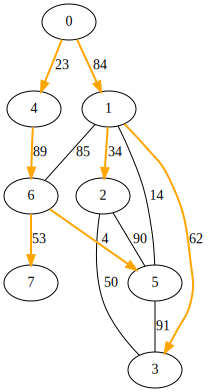

In [14]:
Camino, Costo = dijkstra(G, 0)
print(Camino)
print(Costo)
drawG_al(G, Peso=True, Camino=Camino)